In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
from sqlalchemy import create_engine

engine = create_engine(
    "postgresql://robot-startml-ro:pheiph0hahj1Vaif@"
    "postgres.lab.karpov.courses:6432/startml"
)

<Axes: xlabel='age', ylabel='Probability'>

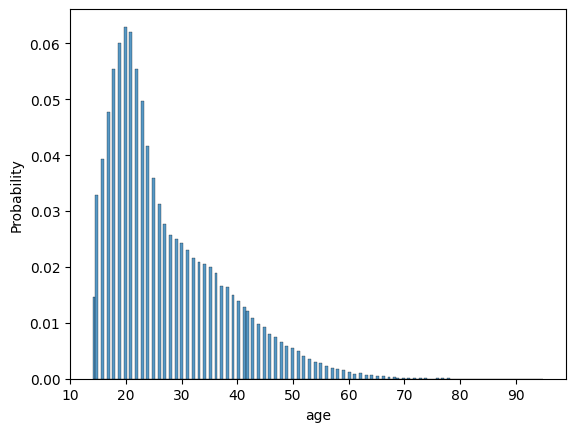

In [6]:
sample5 = pd.read_sql(
    """
    SELECT
        *
    FROM user_data 
    WHERE 1=1
;
""", con=engine)
import seaborn as sns
sns.histplot(data=sample5['age'],stat='probability')

<Axes: xlabel='age', ylabel='Probability'>

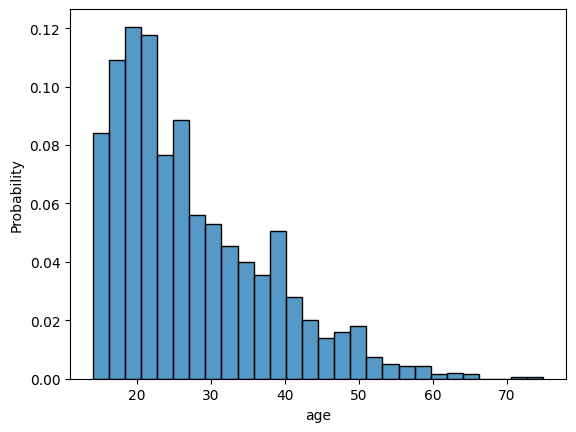

In [7]:
from scipy.stats import describe
from scipy import stats

sample = sample5['age'].sample(2000)

sns.histplot(data=sample,stat='probability')

In [8]:
sample.describe()

count    2000.000000
mean       27.396500
std        10.272977
min        14.000000
25%        19.000000
50%        24.000000
75%        33.000000
max        75.000000
Name: age, dtype: float64

In [9]:
user_df = pd.read_sql('SELECT * FROM user_data', con=engine)

In [10]:
user_df.describe(include='object')

,country,city,os,source
count,163205,163205,163205,163205
unique,11,3915,2,2
top,Russia,Moscow,Android,ads
freq,143035,21874,105972,101685


In [11]:
user_df = user_df[['user_id', 'country', 'gender', 'age', 'city', 'exp_group']]

In [12]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163205 entries, 0 to 163204
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   user_id    163205 non-null  int64 
 1   country    163205 non-null  object
 2   gender     163205 non-null  int64 
 3   age        163205 non-null  int64 
 4   city       163205 non-null  object
 5   exp_group  163205 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 7.5+ MB


In [ ]:
# user_df.to_csv("users_feautures.csv", index=False)

In [ ]:
# user_df = pd.read_csv("users_feautures.csv")

In [13]:
from config.constants import PROCESSED_DIR
import pickle

pkl_path = PROCESSED_DIR / "user_df.pkl"
with open(pkl_path, 'wb') as f:
    pickle.dump(user_df, f)